<a href="https://colab.research.google.com/github/priyankabansall/PRIYANKA_BANSAL/blob/main/PRIYANKA_BANSAL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Customers dataset preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Law

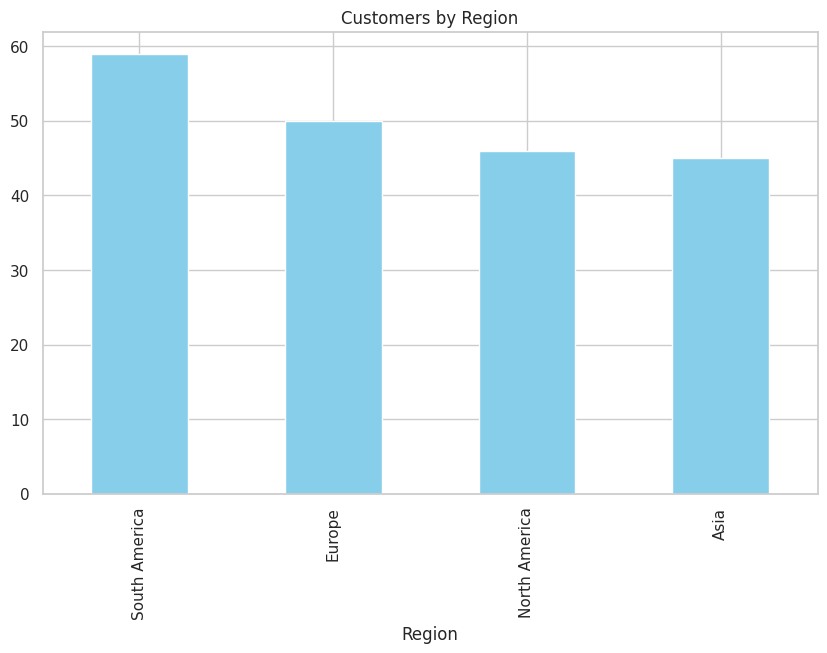

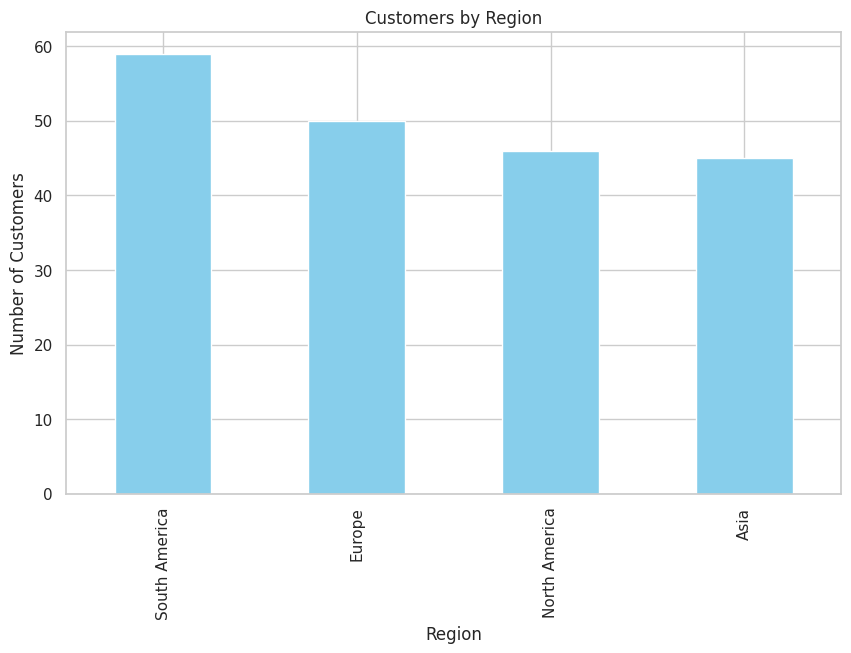

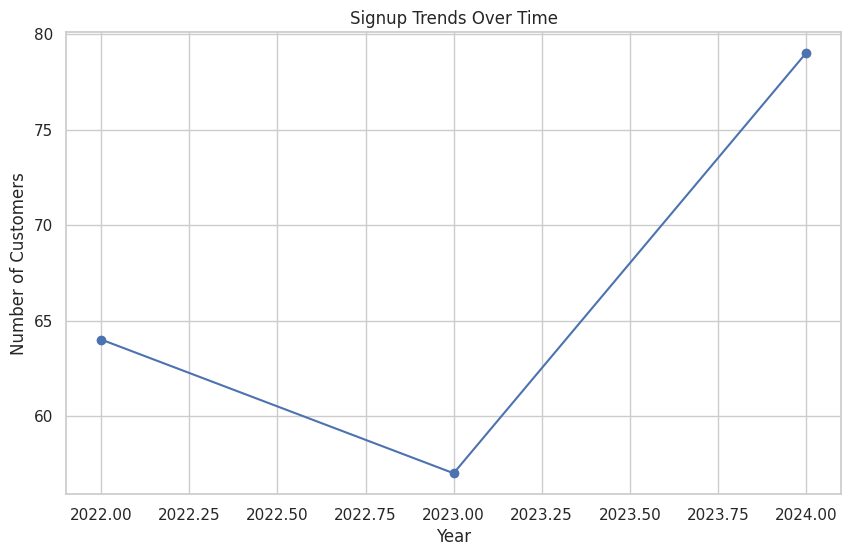


Top product categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


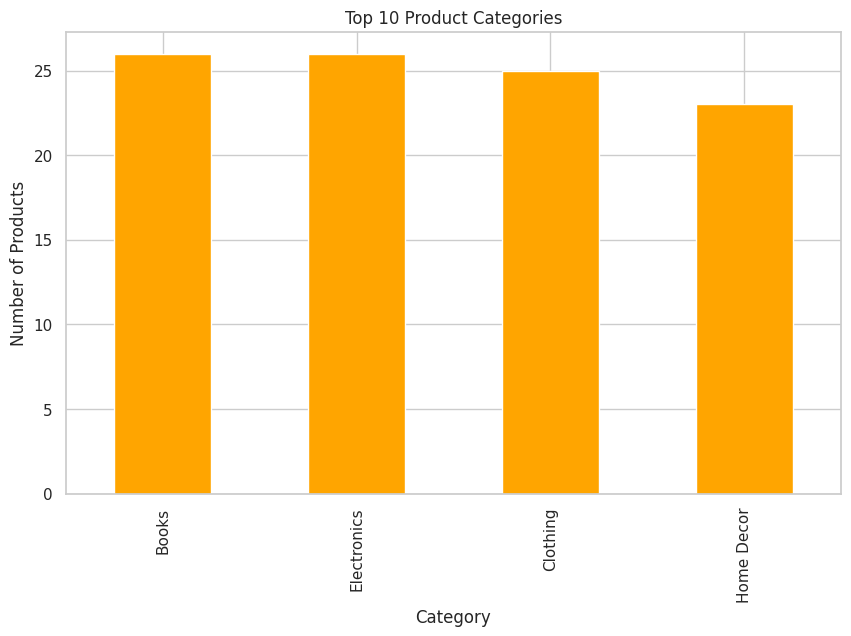

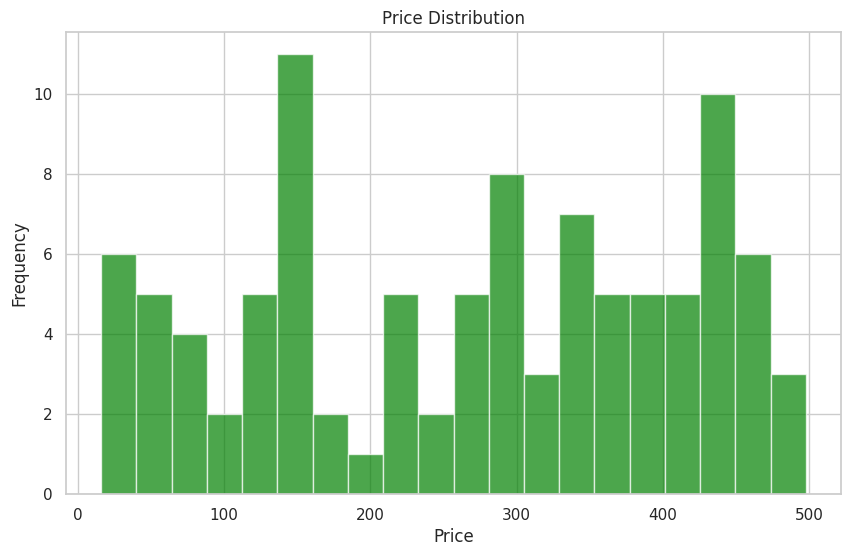


Total sales by year:
TransactionYear
2023      3769.52
2024    686226.04
Name: TotalValue, dtype: float64


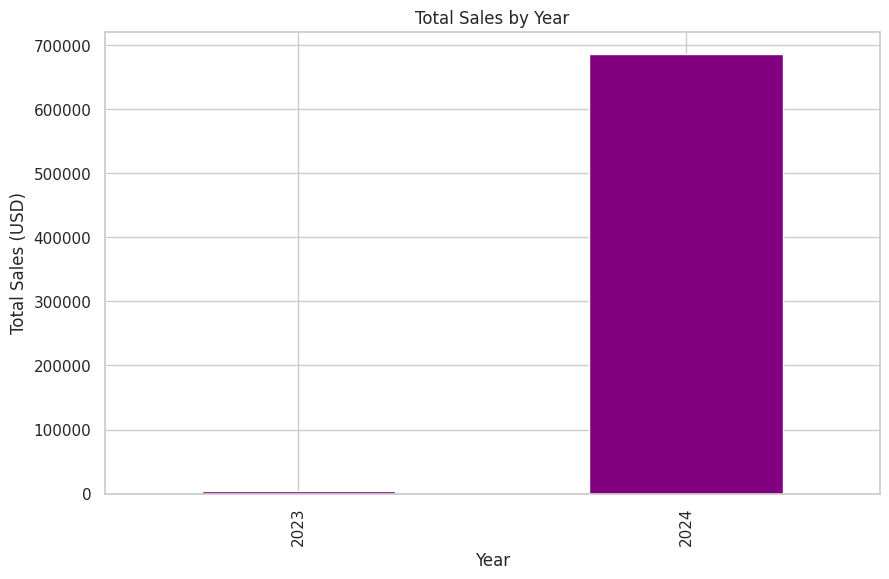


Top 10 customers by total spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


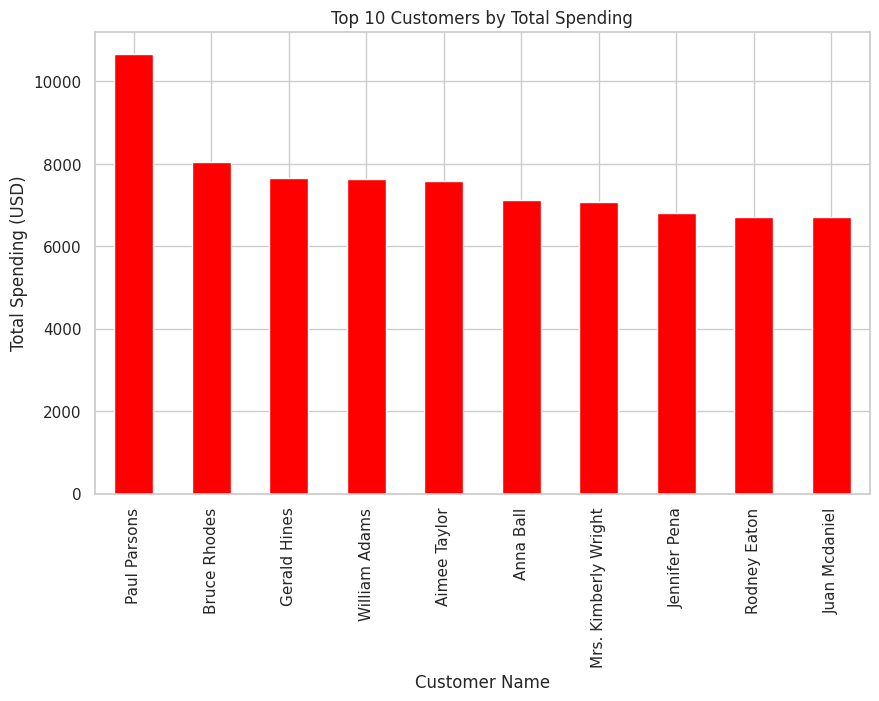


Business Insights:
1. Region with most customers: South America
2. Most popular product category: Books
3. Year with highest sales: 2024
4. Top spender: Paul Parsons
5. Most products are priced within $147.77-$397.09.

Merged dataset saved as 'MergedDataset.csv'.


<ipython-input-11-b8c4abf982d0>:134: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = merged.groupby(pd.Grouper(key="TransactionDate", freq="M"))["TotalValue"].sum()


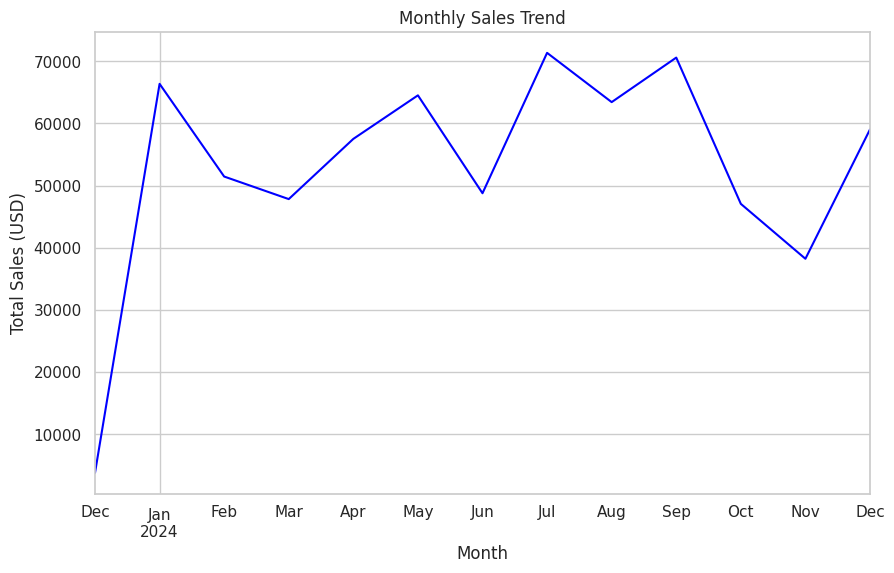

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# DATA OVERVIEW
# Customers dataset
print("\nCustomers dataset preview:")
print(customers.head())
print(customers.info())
print(customers.describe(include="all"))
# Products dataset
print("\nProducts dataset preview:")
print(products.head())
print(products.info())
print(products.describe(include="all"))
# Transactions dataset
print("\nTransactions dataset preview:")
print(transactions.head())
print(transactions.info())
print(transactions.describe(include="all"))

# MISSING VALUES CHECK
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())

print("\nMissing values in Products dataset:")
print(products.isnull().sum())

print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())

# MERGE DATASETS
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print("\nMerged dataset preview:")
print(merged.head())

# ---- EXPLORATORY DATA ANALYSIS ----

# 1. Customers Analysis
# Customers per region
print("\nNumber of customers by region:")
customers["Region"].value_counts().plot(kind="bar", color="skyblue", title="Customers by Region")
plt.show()

# Plot customers by region
region_counts.plot(kind="bar", color="skyblue", title="Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

# Signup trends over time
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
customers["SignupYear"] = customers["SignupDate"].dt.year
signup_trends = customers["SignupYear"].value_counts().sort_index()
signup_trends.plot(kind="line", marker="o", title="Signup Trends Over Time")
plt.ylabel("Number of Customers")
plt.xlabel("Year")
plt.show()

# 2. Products Analysis
# Top product categories
category_counts = products["Category"].value_counts()
print("\nTop product categories:")
print(category_counts)

# Plot product categories
category_counts.head(10).plot(kind="bar", color="orange", title="Top 10 Product Categories")
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.show()

# Price distribution
products["Price"].plot(kind="hist", bins=20, color="green", alpha=0.7, title="Price Distribution")
plt.xlabel("Price")
plt.show()

# 3. Transactions Analysis
# Total sales by year
merged["TransactionDate"] = pd.to_datetime(merged["TransactionDate"])
merged["TransactionYear"] = merged["TransactionDate"].dt.year
sales_by_year = merged.groupby("TransactionYear")["TotalValue"].sum()
print("\nTotal sales by year:")
print(sales_by_year)

# Plot total sales by year
sales_by_year.plot(kind="bar", color="purple", title="Total Sales by Year")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Year")
plt.show()

# Top 10 customers by total spending
top_customers = merged.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 customers by total spending:")
print(top_customers)

# Plot top customers
top_customers.plot(kind="bar", color="red", title="Top 10 Customers by Total Spending")
plt.ylabel("Total Spending (USD)")
plt.xlabel("Customer Name")
plt.show()

# BUSINESS INSIGHTS
insights = [
    "1. Region with most customers: {}".format(customers["Region"].value_counts().idxmax()),
    "2. Most popular product category: {}".format(merged["Category"].value_counts().idxmax()),
    "3. Year with highest sales: {}".format(merged.groupby("TransactionYear")["TotalValue"].sum().idxmax()), # Changed 'Year' to 'TransactionYear'
    "4. Top spender: {}".format(merged.groupby("CustomerName")["TotalValue"].sum().idxmax()),
    "5. Most products are priced within ${:.2f}-${:.2f}.".format(
        products["Price"].quantile(0.25), products["Price"].quantile(0.75)
    ),
]

# Print insights
print("\nBusiness Insights:")
for insight in insights:
    print(insight)

# SAVE MERGED DATASET
merged.to_csv("MergedDataset.csv", index=False)
print("\nMerged dataset saved as 'MergedDataset.csv'.")

# MERGED DATA ANALYSIS
# Group sales by month
sales_trend = merged.groupby(pd.Grouper(key="TransactionDate", freq="M"))["TotalValue"].sum()

# Plot the monthly sales trend
sales_trend.plot(kind="line", figsize=(10, 6), color="blue", title="Monthly Sales Trend", grid=True)
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

